In [1]:
import pandas as pd

# Load the dataset
file_path = 'soildataset1.csv'  # Replace with your actual file path if different
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get dataset summary
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Statistical summary of numerical columns
print("\nStatistical Summary:")
df.describe()


First few rows of the dataset:
      Records     410    435     460     485     510     535    560    585  \
0   100_0ml-1  720.93  146.4  366.36  102.16  174.56  175.43  29.18  35.59   
1   100_0ml-1  716.31  146.4  365.45   94.56  173.06  160.69  24.62  29.86   
2  100_0ml-10  719.39  146.4  366.36   96.25  174.56  162.10  27.36  33.13   
3  100_0ml-10  715.54  146.4  366.36   95.40  173.81  163.50  25.08  30.27   
4   100_0ml-2  720.93  146.4  366.36   95.40  174.56  163.50  27.36  33.13   

      610  ...    900   940  Capacitity Moist  Temp  Moist  EC (u/10 gram)  \
0  150.25  ...  13.83  7.08            2639.0  36.1    0.0             0.0   
1  141.01  ...  13.83  7.08            2650.0  38.2    0.0             0.0   
2  138.70  ...  14.40  7.08            2638.0  36.1    0.0             0.0   
3  144.47  ...  14.40  7.08            2636.0  38.2    0.0             0.0   
4  139.85  ...  13.83  7.08            2637.0  36.1    0.0             0.0   

     Ph  Nitro (mg/10 g)  Posh 

,410,435,460,485,510,535,560,585,610,645,...,900,940,Capacitity Moist,Temp,Moist,EC (u/10 gram),Ph,Nitro (mg/10 g),Posh Nitro (mg/10 g),Pota Nitro (mg/10 g)
count,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,...,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000
mean,730.484686,148.052113,369.417314,94.876308,176.668346,162.670157,26.403170,31.045761,136.298943,43.487736,...,14.393390,6.580346,2469.709434,36.942579,12.818491,1.381440,7.472333,0.103013,0.142006,0.360686
std,55.282172,17.057371,45.512169,9.872939,25.758457,18.408136,5.346591,6.803540,39.746475,9.028637,...,3.050527,0.612657,146.126198,1.836732,11.375369,1.103504,0.377846,0.078072,0.107349,0.272050
min,649.380000,123.430000,307.410000,76.830000,140.850000,129.120000,17.780000,19.640000,77.440000,29.000000,...,10.370000,5.310000,1889.000000,28.000000,0.000000,0.000000,6.880000,0.000000,0.000000,0.000000
25%,687.080000,134.920000,335.530000,87.800000,157.330000,149.460000,22.340000,25.770000,107.490000,36.540000,...,12.100000,6.200000,2353.000000,36.300000,0.000000,0.000000,7.120000,0.000000,0.000000,0.000000
50%,717.850000,143.530000,359.100000,92.870000,169.320000,158.590000,25.080000,29.450000,127.140000,40.680000,...,13.830000,6.200000,2418.000000,37.600000,13.300000,1.840000,7.450000,0.145000,0.200000,0.505000
75%,757.860000,156.920000,392.660000,100.470000,189.550000,173.320000,29.180000,34.770000,153.720000,48.590000,...,15.550000,7.080000,2635.000000,38.300000,22.700000,2.007500,7.870000,0.150000,0.210000,0.530000
max,913.280000,205.720000,657.450000,131.710000,270.460000,251.910000,50.160000,58.500000,294.730000,73.450000,...,26.500000,8.850000,2747.000000,38.600000,38.200000,4.120000,8.070000,0.260000,0.350000,0.890000


In [2]:
# Drop the 'Records' column as it is an identifier and may not add value
df.drop(columns=['Records'], inplace=True)

# Handling missing values
# Drop rows where most critical columns (e.g., nutrient levels) are missing
critical_columns = ['Capacitity Moist', 'Temp', 'Moist', 'EC (u/10 gram)', 'Ph',
                    'Nitro (mg/10 g)', 'Posh Nitro (mg/10 g)', 'Pota Nitro (mg/10 g)']
df = df.dropna(subset=critical_columns)

# Impute missing values in spectrometer columns using the mean
spectrometer_columns = [col for col in df.columns if col.isnumeric()]
df[spectrometer_columns] = df[spectrometer_columns].fillna(df[spectrometer_columns].mean())

# Normalize numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[spectrometer_columns + critical_columns] = scaler.fit_transform(df[spectrometer_columns + critical_columns])

# Check the cleaned dataset
print("Cleaned Dataset Info:")
print(df.info())
print("\nFirst few rows of the cleaned dataset:")
print(df.head())

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1590 entries, 0 to 1589
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   410                   1590 non-null   float64
 1   435                   1590 non-null   float64
 2   460                   1590 non-null   float64
 3   485                   1590 non-null   float64
 4   510                   1590 non-null   float64
 5   535                   1590 non-null   float64
 6   560                   1590 non-null   float64
 7   585                   1590 non-null   float64
 8   610                   1590 non-null   float64
 9   645                   1590 non-null   float64
 10  680                   1590 non-null   float64
 11  705                   1590 non-null   float64
 12  730                   1590 non-null   float64
 13  760                   1590 non-null   float64
 14  810                   1590 non-null   float64
 15  860 

In [3]:
import numpy as np

# Create a composite soil health score as a weighted sum of key indicators
df['Soil_Health_Score'] = (
    0.3 * df['Nitro (mg/10 g)'] +
    0.2 * df['Posh Nitro (mg/10 g)'] +
    0.2 * df['Pota Nitro (mg/10 g)'] +
    0.15 * df['Ph'] +
    0.15 * df['Moist']
)

# Check correlation between spectrometer readings and soil health indicators
correlation_matrix = df.corr()
print("\nCorrelation Matrix (Top 10):")
print(correlation_matrix['Soil_Health_Score'].sort_values(ascending=False).head(10))

# Define features and targets for modeling
spectrometer_columns = [col for col in df.columns if col.isnumeric()]
target_columns = ['Moist', 'EC (u/10 gram)', 'Ph', 
                  'Nitro (mg/10 g)', 'Posh Nitro (mg/10 g)', 'Pota Nitro (mg/10 g)']

X = df[spectrometer_columns]
y = df[target_columns]

print("\nFeatures and Targets prepared for modeling:")
print(f"Features shape: {X.shape}, Targets shape: {y.shape}")



Correlation Matrix (Top 10):
Soil_Health_Score       1.000000
Nitro (mg/10 g)         0.980763
Pota Nitro (mg/10 g)    0.980001
Posh Nitro (mg/10 g)    0.979791
EC (u/10 gram)          0.973964
Moist                   0.928427
Ph                      0.050139
Temp                    0.004952
410                    -0.452755
460                    -0.509045
Name: Soil_Health_Score, dtype: float64

Features and Targets prepared for modeling:
Features shape: (1590, 18), Targets shape: (1590, 6)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train separate regression models for each target
models = {}
predictions = {}
metrics = {}

for target in y.columns:
    print(f"\nTraining model for: {target}")
    # Initialize Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train[target])
    
    # Predict on test data
    y_pred = model.predict(X_test)
    predictions[target] = y_pred
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test[target], y_pred)
    r2 = r2_score(y_test[target], y_pred)
    metrics[target] = {"MSE": mse, "R²": r2}
    
    print(f"Model for {target}: MSE = {mse:.4f}, R² = {r2:.4f}")
    models[target] = model

# Display metrics for all models
print("\nMetrics for all models:")
for target, metric in metrics.items():
    print(f"{target}: MSE = {metric['MSE']:.4f}, R² = {metric['R²']:.4f}")



Training model for: Moist
Model for Moist: MSE = 0.0055, R² = 0.9409

Training model for: EC (u/10 gram)
Model for EC (u/10 gram): MSE = 0.0035, R² = 0.9505

Training model for: Ph
Model for Ph: MSE = 0.0376, R² = 0.6164

Training model for: Nitro (mg/10 g)
Model for Nitro (mg/10 g): MSE = 0.0045, R² = 0.9501

Training model for: Posh Nitro (mg/10 g)
Model for Posh Nitro (mg/10 g): MSE = 0.0046, R² = 0.9507

Training model for: Pota Nitro (mg/10 g)
Model for Pota Nitro (mg/10 g): MSE = 0.0048, R² = 0.9485

Metrics for all models:
Moist: MSE = 0.0055, R² = 0.9409
EC (u/10 gram): MSE = 0.0035, R² = 0.9505
Ph: MSE = 0.0376, R² = 0.6164
Nitro (mg/10 g): MSE = 0.0045, R² = 0.9501
Posh Nitro (mg/10 g): MSE = 0.0046, R² = 0.9507
Pota Nitro (mg/10 g): MSE = 0.0048, R² = 0.9485


In [7]:
from sklearn.model_selection import GridSearchCV
import joblib

# Define parameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Tuning the weakest performing model
target_to_tune = 'Ph'  # Replace with the target you want to refine
print(f"\nTuning model for: {target_to_tune}")

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train[target_to_tune])

# Best parameters and score
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# tuned_models[target_to_tune] = best_model
joblib.dump(best_model, f'{target_to_tune}_model.pkl')

print(f"Best parameters for {target_to_tune}: {best_params}")
print(f"Best R² score during cross-validation: {best_score:.4f}")

# Evaluate the tuned model on test data
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test[target_to_tune], y_pred_tuned)
r2_tuned = r2_score(y_test[target_to_tune], y_pred_tuned)

print(f"Tuned model for {target_to_tune}: MSE = {mse_tuned:.4f}, R² = {r2_tuned:.4f}")



Tuning model for: Ph
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Ph: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score during cross-validation: 0.5437
Tuned model for Ph: MSE = 0.0371, R² = 0.6218


In [8]:
# Repeat the tuning process for another target

target_to_tune = 'Moist'  # Replace with the target to refine
print(f"\nTuning model for: {target_to_tune}")

grid_search.fit(X_train, y_train[target_to_tune])

# Best parameters and score
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

joblib.dump(best_model, f'{target_to_tune}_model.pkl')

print(f"Best parameters for {target_to_tune}: {best_params}")
print(f"Best R² score during cross-validation: {best_score:.4f}")

# Evaluate the tuned model on test data
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test[target_to_tune], y_pred_tuned)
r2_tuned = r2_score(y_test[target_to_tune], y_pred_tuned)

print(f"Tuned model for {target_to_tune}: MSE = {mse_tuned:.4f}, R² = {r2_tuned:.4f}")



Tuning model for: Moist
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Moist: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score during cross-validation: 0.9164
Tuned model for Moist: MSE = 0.0056, R² = 0.9395


In [12]:
# Repeat the tuning process for another target

target_to_tune = 'EC (u/10 gram)'  # Replace with the target to refine
print(f"\nTuning model for: {target_to_tune}")

grid_search.fit(X_train, y_train[target_to_tune])

# Best parameters and score
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

joblib.dump(best_model, "EC_model.pkl")

print(f"Best parameters for {target_to_tune}: {best_params}")
print(f"Best R² score during cross-validation: {best_score:.4f}")

# Evaluate the tuned model on test data
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test[target_to_tune], y_pred_tuned)
r2_tuned = r2_score(y_test[target_to_tune], y_pred_tuned)

print(f"Tuned model for {target_to_tune}: MSE = {mse_tuned:.4f}, R² = {r2_tuned:.4f}")



Tuning model for: EC (u/10 gram)
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for EC (u/10 gram): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score during cross-validation: 0.9221
Tuned model for EC (u/10 gram): MSE = 0.0037, R² = 0.9486


In [13]:
# Repeat the tuning process for another target

target_to_tune = 'Nitro (mg/10 g)'  # Replace with the target to refine
print(f"\nTuning model for: {target_to_tune}")

grid_search.fit(X_train, y_train[target_to_tune])

# Best parameters and score
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

joblib.dump(best_model, "Nitro_mg10_model.pkl")

print(f"Best parameters for {target_to_tune}: {best_params}")
print(f"Best R² score during cross-validation: {best_score:.4f}")

# Evaluate the tuned model on test data
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test[target_to_tune], y_pred_tuned)
r2_tuned = r2_score(y_test[target_to_tune], y_pred_tuned)

print(f"Tuned model for {target_to_tune}: MSE = {mse_tuned:.4f}, R² = {r2_tuned:.4f}")



Tuning model for: Nitro (mg/10 g)
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Nitro (mg/10 g): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score during cross-validation: 0.9280
Tuned model for Nitro (mg/10 g): MSE = 0.0043, R² = 0.9526


In [14]:
# Repeat the tuning process for another target

target_to_tune = 'Posh Nitro (mg/10 g)'  # Replace with the target to refine
print(f"\nTuning model for: {target_to_tune}")

grid_search.fit(X_train, y_train[target_to_tune])

# Best parameters and score
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

joblib.dump(best_model, "PoshNitro_mg10_model.pkl")

print(f"Best parameters for {target_to_tune}: {best_params}")
print(f"Best R² score during cross-validation: {best_score:.4f}")

# Evaluate the tuned model on test data
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test[target_to_tune], y_pred_tuned)
r2_tuned = r2_score(y_test[target_to_tune], y_pred_tuned)

print(f"Tuned model for {target_to_tune}: MSE = {mse_tuned:.4f}, R² = {r2_tuned:.4f}")



Tuning model for: Posh Nitro (mg/10 g)
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Posh Nitro (mg/10 g): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score during cross-validation: 0.9292
Tuned model for Posh Nitro (mg/10 g): MSE = 0.0045, R² = 0.9525


In [15]:
# Repeat the tuning process for another target

target_to_tune = 'Pota Nitro (mg/10 g)'  # Replace with the target to refine
print(f"\nTuning model for: {target_to_tune}")

grid_search.fit(X_train, y_train[target_to_tune])

# Best parameters and score
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

joblib.dump(best_model, "PotaNitro_mg10_model.pkl")

print(f"Best parameters for {target_to_tune}: {best_params}")
print(f"Best R² score during cross-validation: {best_score:.4f}")

# Evaluate the tuned model on test data
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test[target_to_tune], y_pred_tuned)
r2_tuned = r2_score(y_test[target_to_tune], y_pred_tuned)

print(f"Tuned model for {target_to_tune}: MSE = {mse_tuned:.4f}, R² = {r2_tuned:.4f}")



Tuning model for: Pota Nitro (mg/10 g)
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Pota Nitro (mg/10 g): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best R² score during cross-validation: 0.9292
Tuned model for Pota Nitro (mg/10 g): MSE = 0.0049, R² = 0.9474


Visualizing feature importance for: Ph


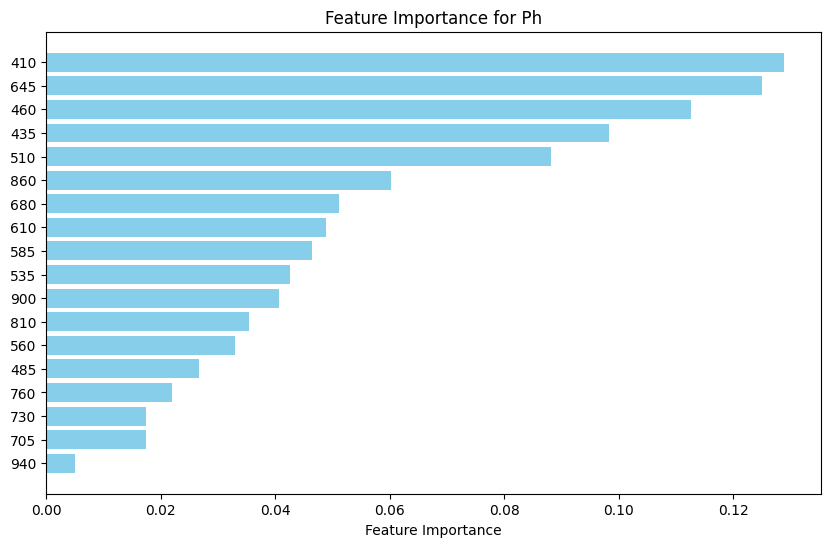

Visualizing feature importance for: Moist


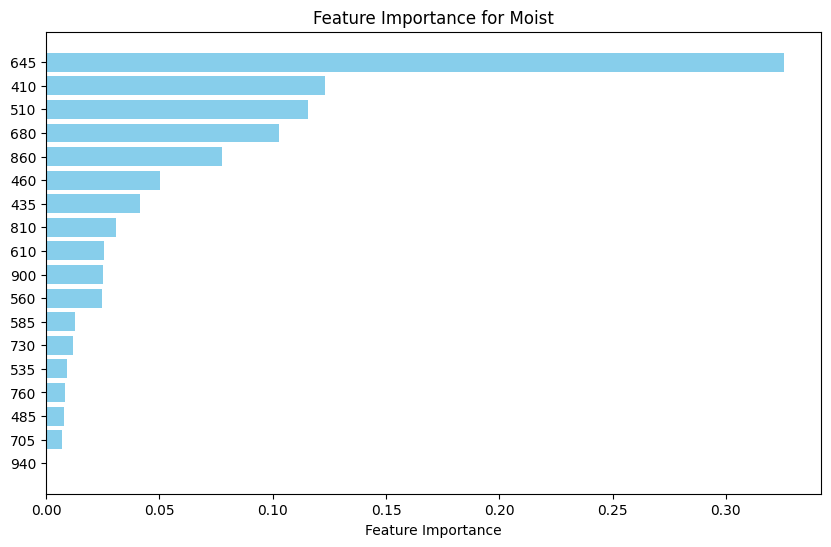

Visualizing feature importance for: EC


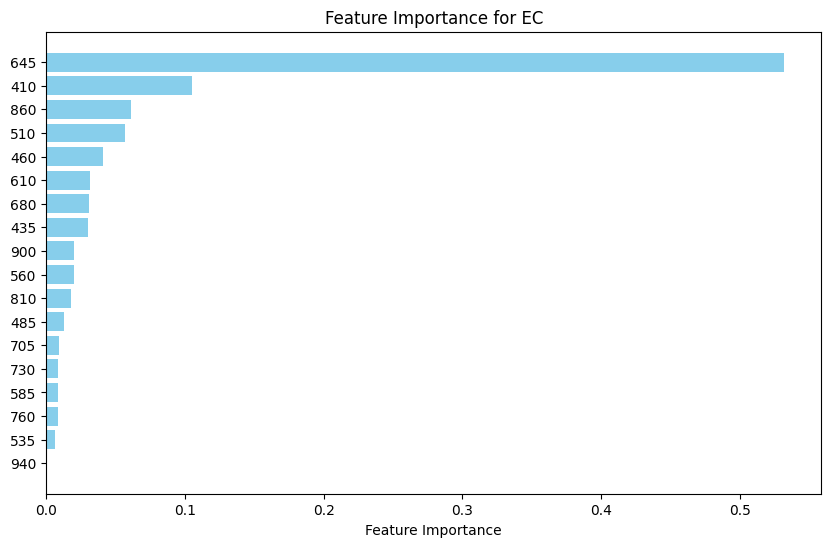

Visualizing feature importance for: Nitro_mg10


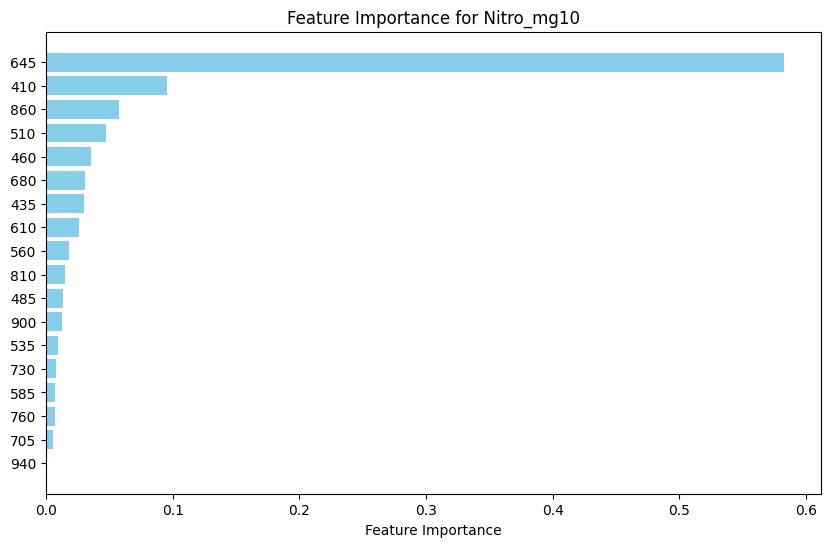

Visualizing feature importance for: PoshNitro_mg10


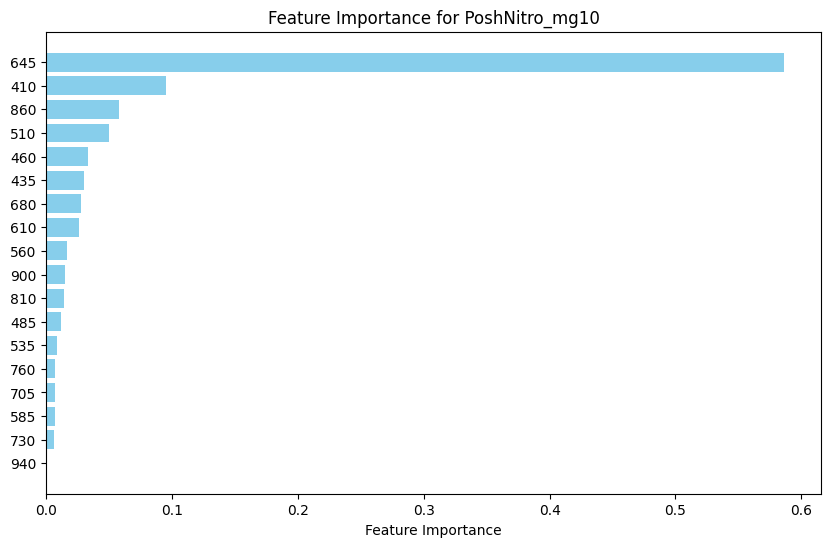

Visualizing feature importance for: PotaNitro_mg10


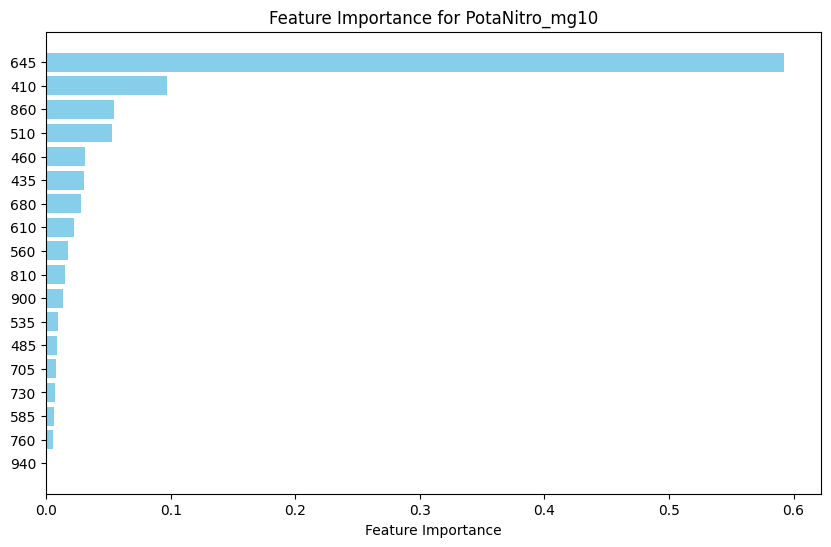

In [17]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Function to plot feature importance
def plot_feature_importance(model, feature_names, target_name):
    """
    Plots the feature importance for a given model and target.
    """
    # Get feature importance values
    importance = model.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(importance)[::-1]
    sorted_importance = importance[indices]
    sorted_features = [feature_names[i] for i in indices]
    
    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importance, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance for {target_name}')
    plt.gca().invert_yaxis()  # To display the most important feature at the top
    plt.show()

# Load each model and visualize feature importance
model_files = {
    "Ph": "Ph_model.pkl",
    "Moist": "Moist_model.pkl",
    "EC": "EC_model.pkl",
    "Nitro_mg10": "Nitro_mg10_model.pkl",
    "PoshNitro_mg10": "PoshNitro_mg10_model.pkl",
    "PotaNitro_mg10": "PotaNitro_mg10_model.pkl"
}

for target_name, model_file in model_files.items():
    print(f"Visualizing feature importance for: {target_name}")
    # Load the model
    model = joblib.load(model_file)
    # Plot feature importance
    plot_feature_importance(model, X_train.columns, target_name)


In [25]:
# Example new data for prediction (replace this with your actual test data or new data)
new_data = X_test.copy()  # Use the test set as an example

# Load the models and predict
predictions = {}
for target_name, model_file in model_files.items():
    print(f"Predicting {target_name} values...")
    model = joblib.load(model_file)
    predictions[target_name] = model.predict(new_data)

# Combine predictions into a DataFrame
import pandas as pd
predictions_df = pd.DataFrame(predictions)
print("\nPredicted Soil Health Indicators:")
print(predictions_df.head(10))


Predicting Ph values...
Predicting Moist values...
Predicting EC values...
Predicting Nitro_mg10 values...
Predicting PoshNitro_mg10 values...
Predicting PotaNitro_mg10 values...

Predicted Soil Health Indicators:
         Ph     Moist        EC  Nitro_mg10  PoshNitro_mg10  PotaNitro_mg10
0  0.374874  0.481191  0.462295    0.555122        0.555857        0.543446
1  0.357227  0.517618  0.438872    0.540670        0.553857        0.564593
2  0.665714  0.563665  0.480397    0.573029        0.595143        0.590879
3  0.425840  0.529228  0.498235    0.605542        0.626143        0.612584
4  0.244118  0.039215  0.304556    0.433057        0.442714        0.456180
5  0.370588  0.002866  0.000000    0.000000        0.000000        0.000000
6  0.933697  0.000000  0.000000    0.000000        0.000000        0.000000
7  0.720294  0.501204  0.394286    0.500731        0.496000        0.507507
8  0.220840  0.033233  0.017597    0.005962        0.008429        0.000000
9  0.230630  0.015929  0.0

In [26]:
# Example weights for soil health indicators
weights = {
    "Ph": 0.2,
    "Moist": 0.3,
    "EC": 0.1,
    "Nitro_mg10": 0.15,
    "PoshNitro_mg10": 0.15,
    "PotaNitro_mg10": 0.1
}

# Calculate the weighted soil health score
predictions_df['Soil_Health_Score'] = predictions_df.apply(
    lambda row: sum(row[target] * weight for target, weight in weights.items()), axis=1
)
print("\nSoil Health Scores:")
print(predictions_df[['Soil_Health_Score']].head(10))



Soil Health Scores:
   Soil_Health_Score
0           0.486553
1           0.491256
2           0.584596
3           0.539771
4           0.268027
5           0.074978
6           0.186739
7           0.534109
8           0.058056
9           0.066799


In [30]:
def generate_insights(row):
    insights = []
    
    if row['Moist'] < 0.3:
        insights.append("Increase irrigation to maintain adequate moisture levels.")
    if row['Nitro_mg10'] < 0.5:
        insights.append("Consider applying nitrogen-rich fertilizers.")
    if row['Ph'] < 6.0 or row['Ph'] > 7.5:
        insights.append("Adjust soil pH for optimal nutrient absorption.")
    if row['Soil_Health_Score'] < 0.5:
        insights.append("Overall soil health is low; consider organic matter enrichment.")
    
    return insights

# Apply insights generation to predictions
predictions_df['Insights'] = predictions_df.apply(generate_insights, axis=1)
print("\nActionable Insights for Farmers:")
print(predictions_df[['Soil_Health_Score', 'Insights']].head(25))



Actionable Insights for Farmers:
    Soil_Health_Score                                           Insights
0            0.486553  [Adjust soil pH for optimal nutrient absorptio...
1            0.491256  [Adjust soil pH for optimal nutrient absorptio...
2            0.584596  [Adjust soil pH for optimal nutrient absorption.]
3            0.539771  [Adjust soil pH for optimal nutrient absorption.]
4            0.268027  [Increase irrigation to maintain adequate mois...
5            0.074978  [Increase irrigation to maintain adequate mois...
6            0.186739  [Increase irrigation to maintain adequate mois...
7            0.534109  [Adjust soil pH for optimal nutrient absorption.]
8            0.058056  [Increase irrigation to maintain adequate mois...
9            0.066799  [Increase irrigation to maintain adequate mois...
10           0.525657  [Adjust soil pH for optimal nutrient absorption.]
11           0.545255  [Adjust soil pH for optimal nutrient absorption.]
12           0.07

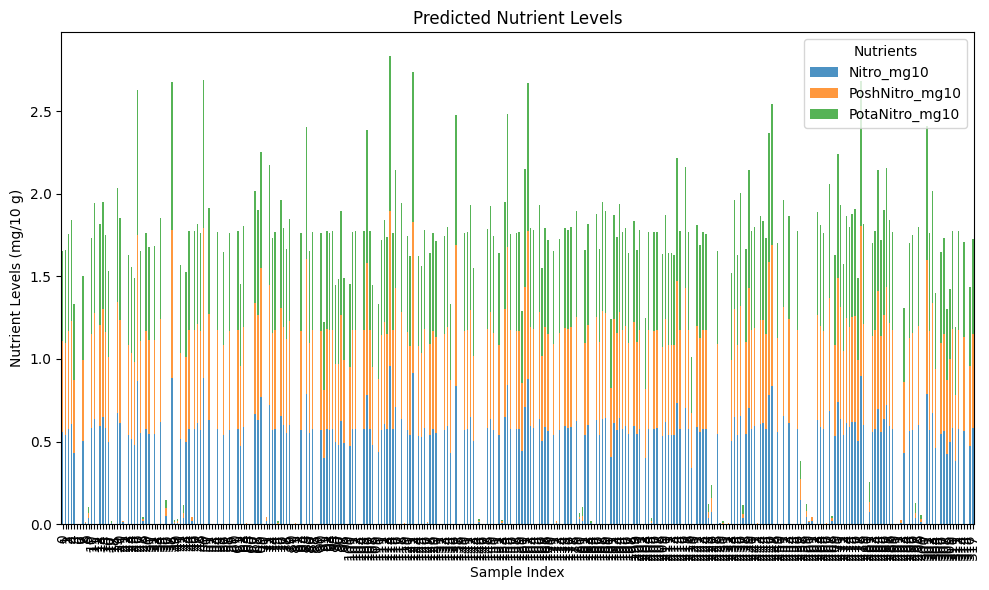

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for nutrient levels
nutrient_columns = ['Nitro_mg10', 'PoshNitro_mg10', 'PotaNitro_mg10']
predictions_df[nutrient_columns].plot(kind='bar', figsize=(10, 6), stacked=True, alpha=0.8)
plt.title("Predicted Nutrient Levels")
plt.xlabel("Sample Index")
plt.ylabel("Nutrient Levels (mg/10 g)")
plt.legend(title="Nutrients")
plt.tight_layout()
plt.show()


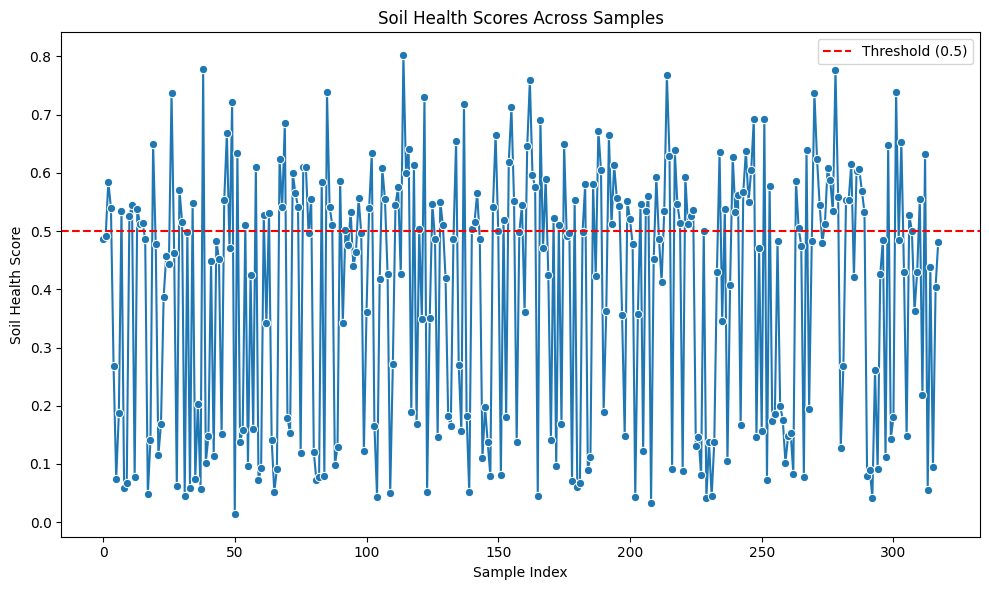

In [32]:
# Line chart for soil health scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=predictions_df, x=predictions_df.index, y='Soil_Health_Score', marker="o")
plt.title("Soil Health Scores Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Soil Health Score")
plt.axhline(y=0.5, color='r', linestyle='--', label="Threshold (0.5)")
plt.legend()
plt.tight_layout()
plt.show()


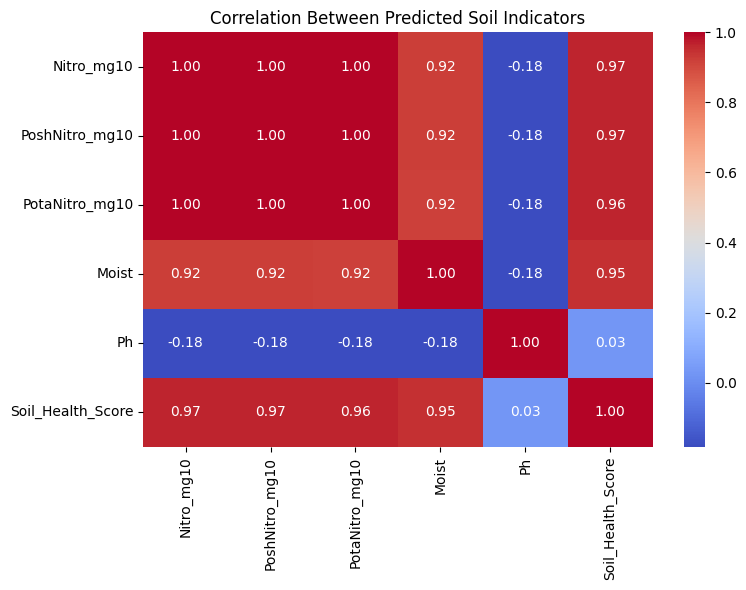

In [33]:
# Correlation heatmap for predictions
plt.figure(figsize=(8, 6))
correlation_matrix = predictions_df[nutrient_columns + ['Moist', 'Ph', 'Soil_Health_Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Predicted Soil Indicators")
plt.tight_layout()
plt.show()


C:\Users\Kavish\AppData\Local\Temp\ipykernel_17432\2380483544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=insights_summary.values, y=insights_summary.index, palette="viridis")


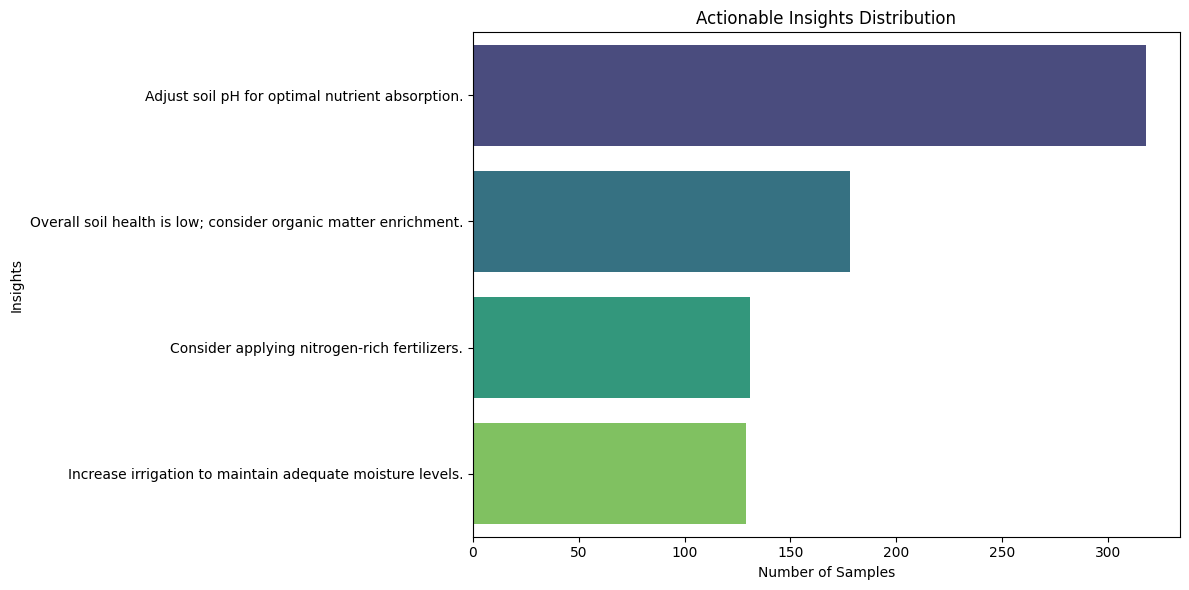

In [34]:
# Count actionable insights
insights_flat = predictions_df['Insights'].explode()
insights_summary = insights_flat.value_counts()

# Bar chart for actionable insights
plt.figure(figsize=(12, 6))
sns.barplot(x=insights_summary.values, y=insights_summary.index, palette="viridis")
plt.title("Actionable Insights Distribution")
plt.xlabel("Number of Samples")
plt.ylabel("Insights")
plt.tight_layout()
plt.show()
